In [2]:
import os
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Flatten, Dense, Dropout
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image, display

In [20]:
batch_size = 32
epochs = 50

classes = ['beige', 'black', 'blue', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow']
nb_classes = len(classes)

img_rows = 100
img_cols = 100
channels = 3

train_data_dir = './data/train'
validation_data_dir = './data/validation'

result_dir = './results'

In [21]:
if not os.path.exists(result_dir):
    os.mkdir(result_dir)

In [22]:
input_tensor = Input(shape=(img_rows, img_cols, channels))
base_model = VGG16(weights='imagenet', input_tensor=input_tensor, include_top=False)

In [23]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [24]:
x = base_model.output
x = Flatten(input_shape=base_model.output_shape[1:])(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(nb_classes, activation='softmax')(x)

In [25]:
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [27]:
for layer in model.layers[:15]:
    layer.trainable = False

In [29]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
             metrics=['accuracy'])

In [32]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=5,
    horizontal_flip=True
)

In [33]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [35]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows, img_cols),
    color_mode='rgb',
    classes=classes,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_rows, img_cols),
    color_mode='rgb',
    classes=classes,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True
)

Found 1099 images belonging to 11 classes.
Found 767 images belonging to 11 classes.


In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

Epoch 1/50
34/34 [==============================] - 252s - loss: 2.7165 - acc: 0.1204 - val_loss: 2.3104 - val_acc: 0.1957
Epoch 2/50
34/34 [==============================] - 225s - loss: 2.3472 - acc: 0.1746 - val_loss: 2.2248 - val_acc: 0.2514
Epoch 3/50
34/34 [==============================] - 226s - loss: 2.2037 - acc: 0.2344 - val_loss: 2.1554 - val_acc: 0.2677
Epoch 4/50
34/34 [==============================] - 270s - loss: 2.1215 - acc: 0.2744 - val_loss: 2.0825 - val_acc: 0.3274
Epoch 5/50
34/34 [==============================] - 225s - loss: 2.0144 - acc: 0.3104 - val_loss: 2.0019 - val_acc: 0.3614
Epoch 6/50
34/34 [==============================] - 227s - loss: 1.9304 - acc: 0.3561 - val_loss: 1.9331 - val_acc: 0.3709
Epoch 7/50
34/34 [==============================] - 227s - loss: 1.8210 - acc: 0.3829 - val_loss: 1.8631 - val_acc: 0.3723
Epoch 8/50
34/34 [==============================] - 265s - loss: 1.7615 - acc: 0.4024 - val_loss: 1.7842 - val_acc: 0.4280
Epoch 9/50
34/34

In [37]:
history.history

{'acc': [0.12040441176470588,
  0.17619493910946796,
  0.23711340208978662,
  0.2727272728389965,
  0.31115276484480503,
  0.35426429254827707,
  0.38331771332634423,
  0.40487347712221833,
  0.45079662622194372,
  0.48828491113290901,
  0.47985004697207995,
  0.50984067492878316,
  0.51077788207948827,
  0.56513589520038798,
  0.57825679489129489,
  0.57169634505980682,
  0.57919400209786187,
  0.63542642912913838,
  0.62699156502417119,
  0.63542642940844796,
  0.65417057197565442,
  0.66541705728135825,
  0.68978444258520955,
  0.70103092777918963,
  0.70009372065641551,
  0.69915651372915799,
  0.7235238990050783,
  0.73195876277487415,
  0.73102155604313335,
  0.73758200556738085,
  0.74414245565024739,
  0.76382380494919466,
  0.77788191212597801,
  0.77788191212597801,
  0.77881911896944267,
  0.78676470588235292,
  0.78537956877299975,
  0.80974695435616051,
  0.80412371122848236,
  0.82286785373982696,
  0.81818181807009438,
  0.80412371161951568,
  0.84348641072016739,
  0.80

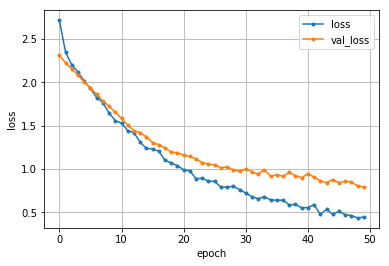

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

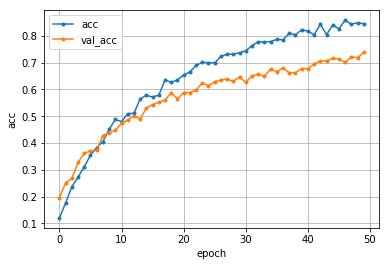

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [40]:
import pickle

In [41]:
with open('./results/history.pkl', mode='wbf') as f:
    pickle.dump(history.history, f)

In [42]:
model.save('./results/vgg16-finetuning.h5')

In [43]:
def predict(img_file_path):
    
    display(Image(img_file_path, width=150, unconfined=True))
    img = image.load_img(img_file_path, target_size=(img_rows, img_cols))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    x = x / 255.0
    
    pred = model.predict(x)[0]
    
    top = 5
    top_indices = pred.argsort()[-top:][::-1]
    result = [(classes[i], pred[i]) for i in top_indices]
    for x in result:
        print(x)

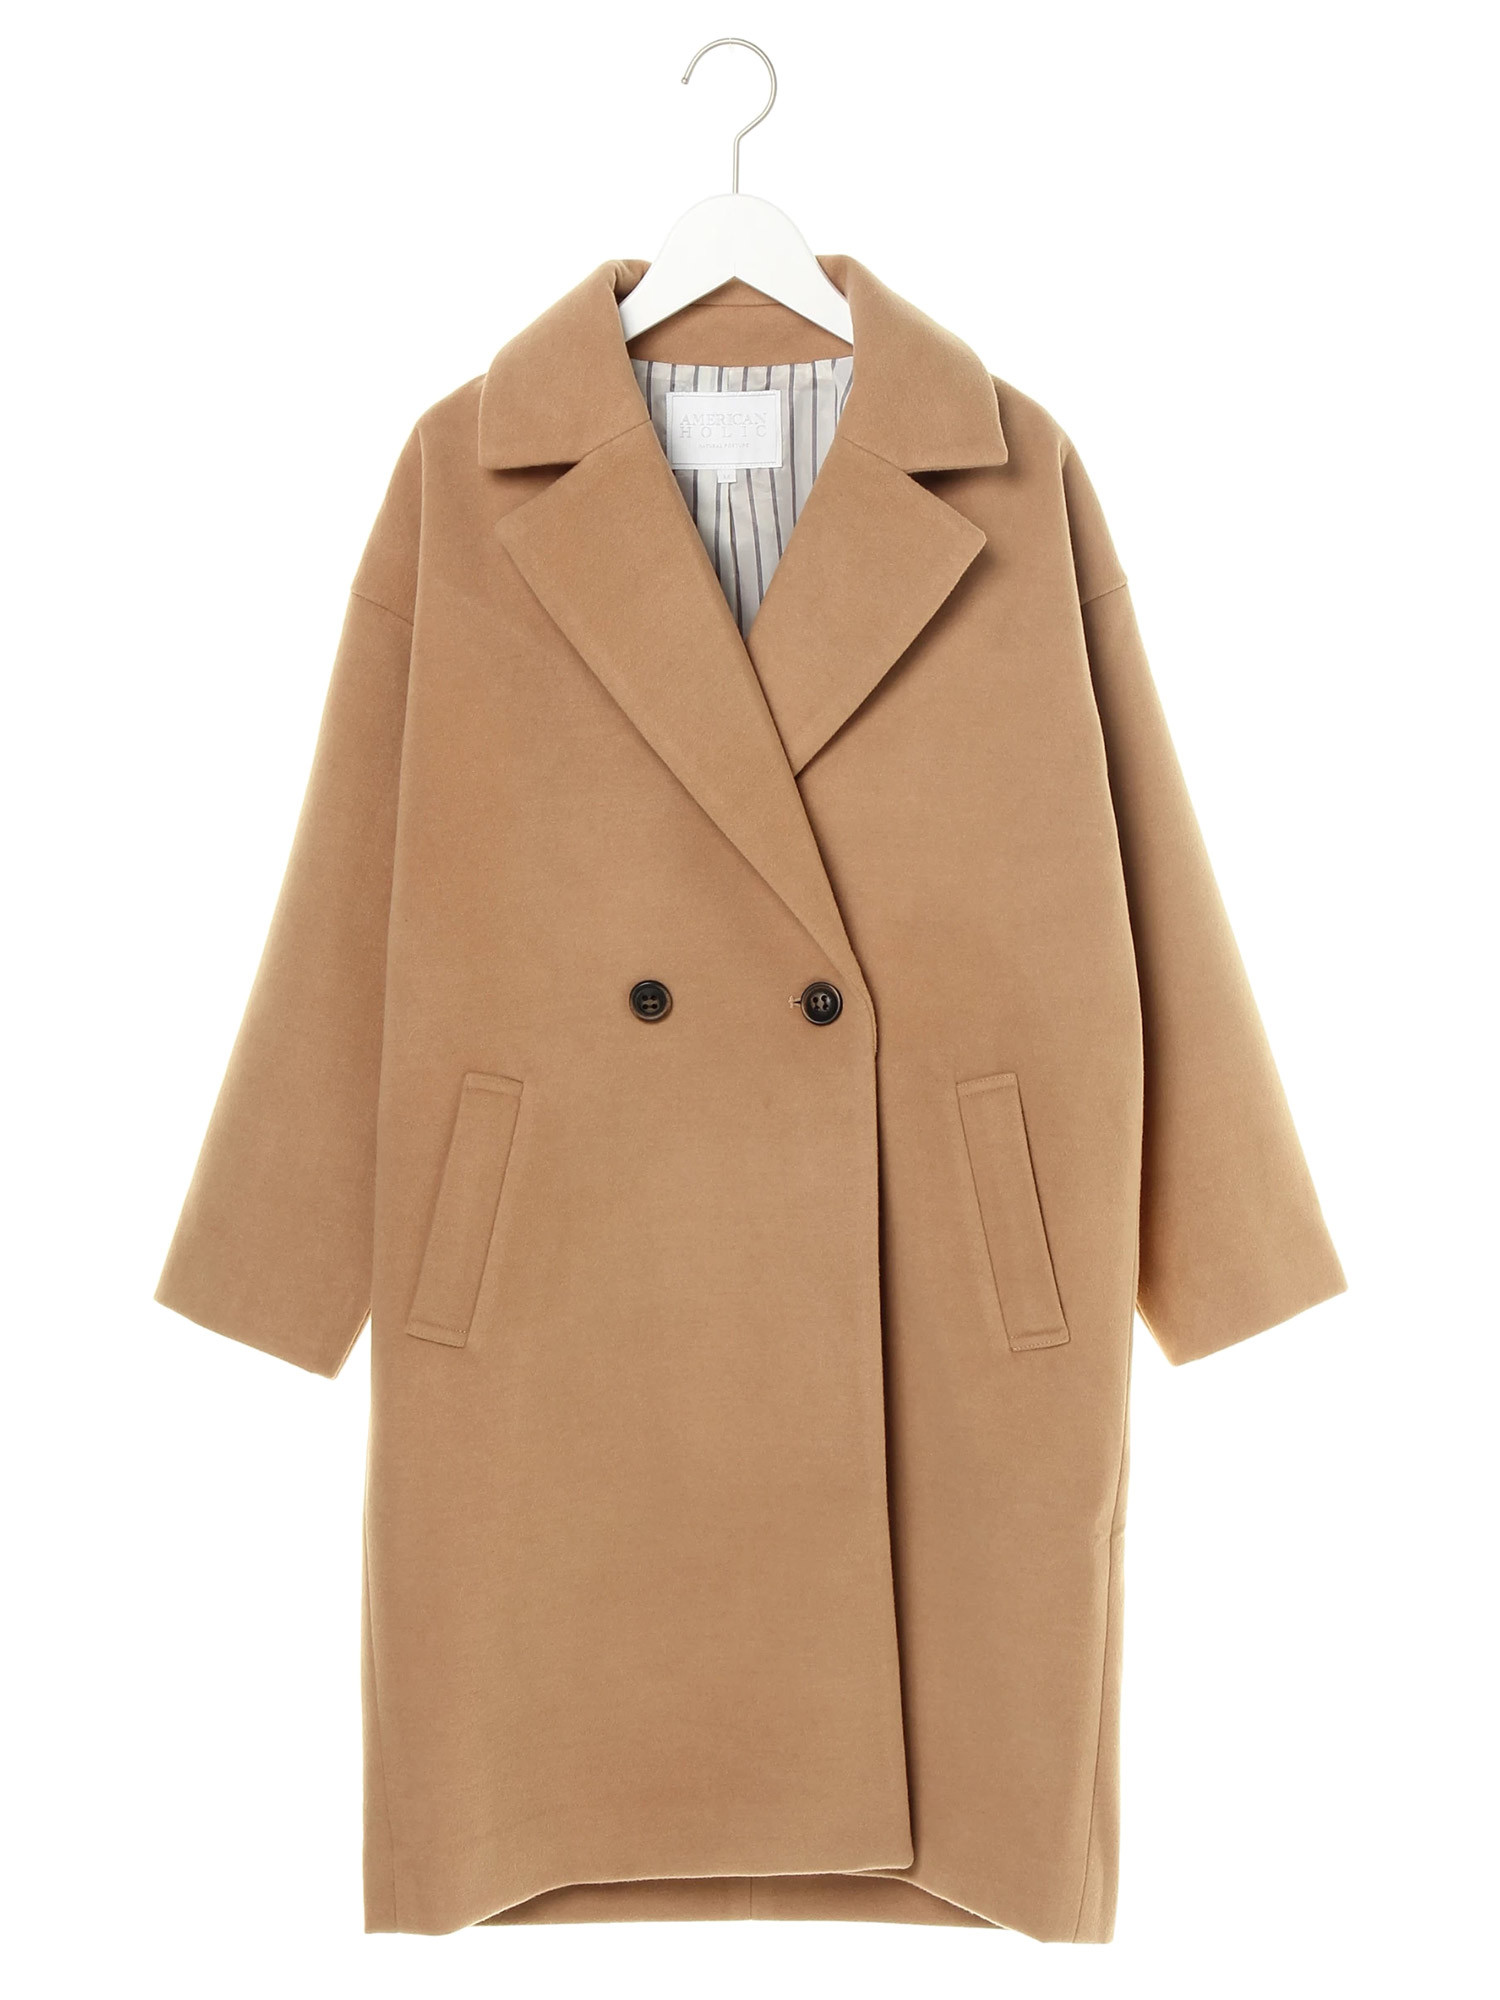

('beige', 0.82451457)
('pink', 0.14420632)
('orange', 0.016382243)
('green', 0.0073901601)
('yellow', 0.0038018362)


In [44]:
predict('./data/samples/beige.jpg')

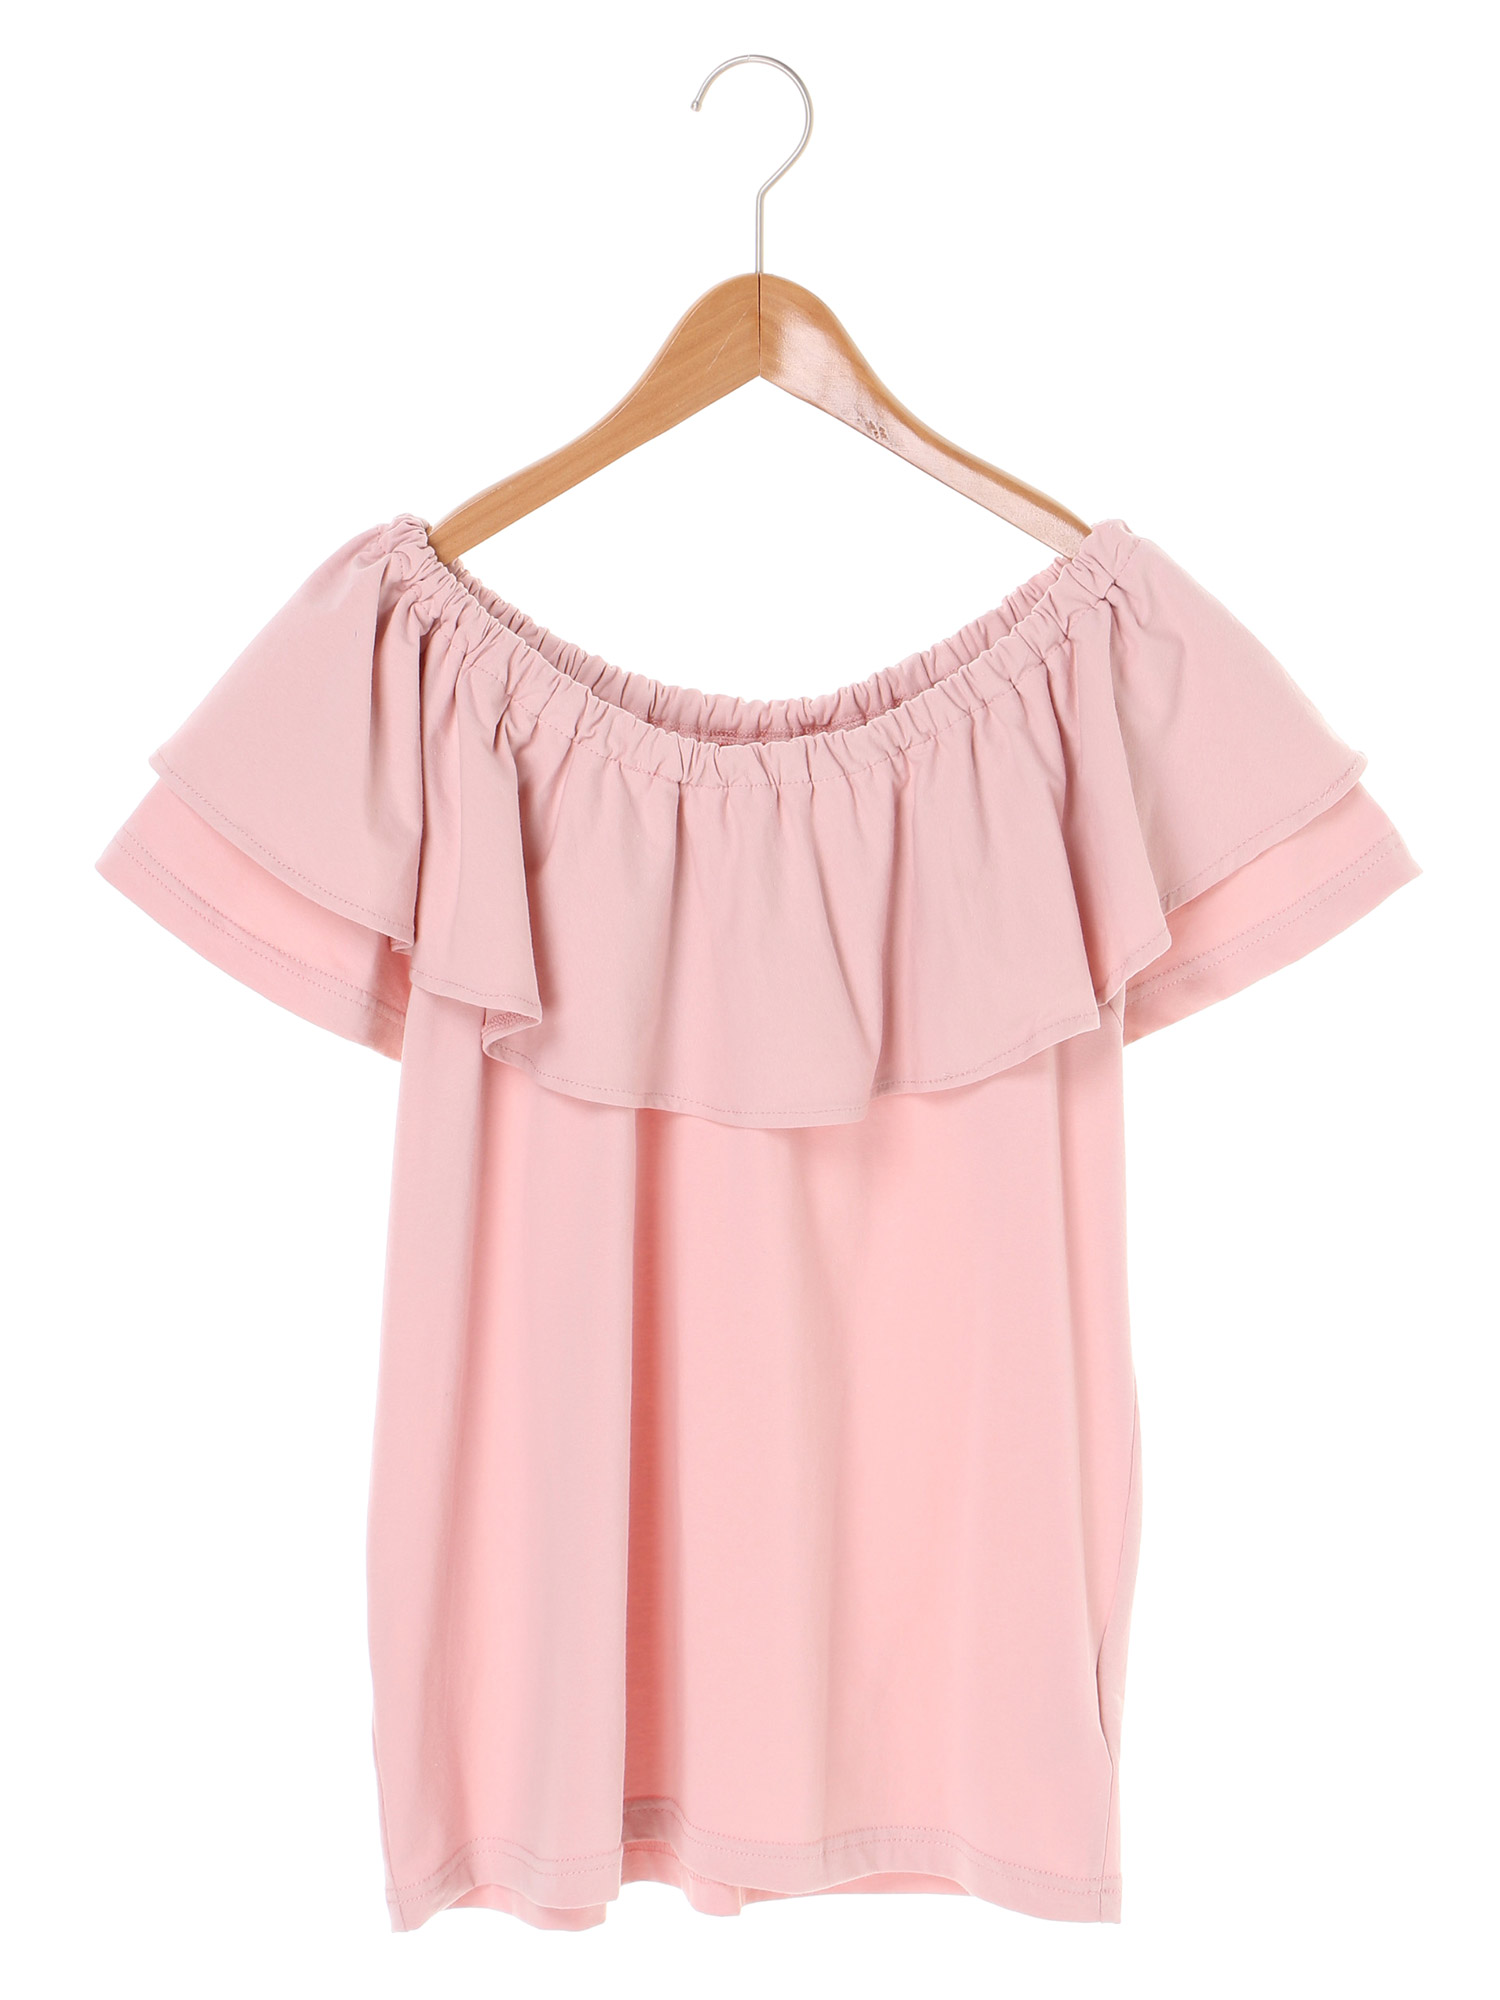

('pink', 0.69653755)
('yellow', 0.21236435)
('purple', 0.075035736)
('beige', 0.0060977838)
('green', 0.0029711509)


In [45]:
predict('./data/samples/pink.jpg')

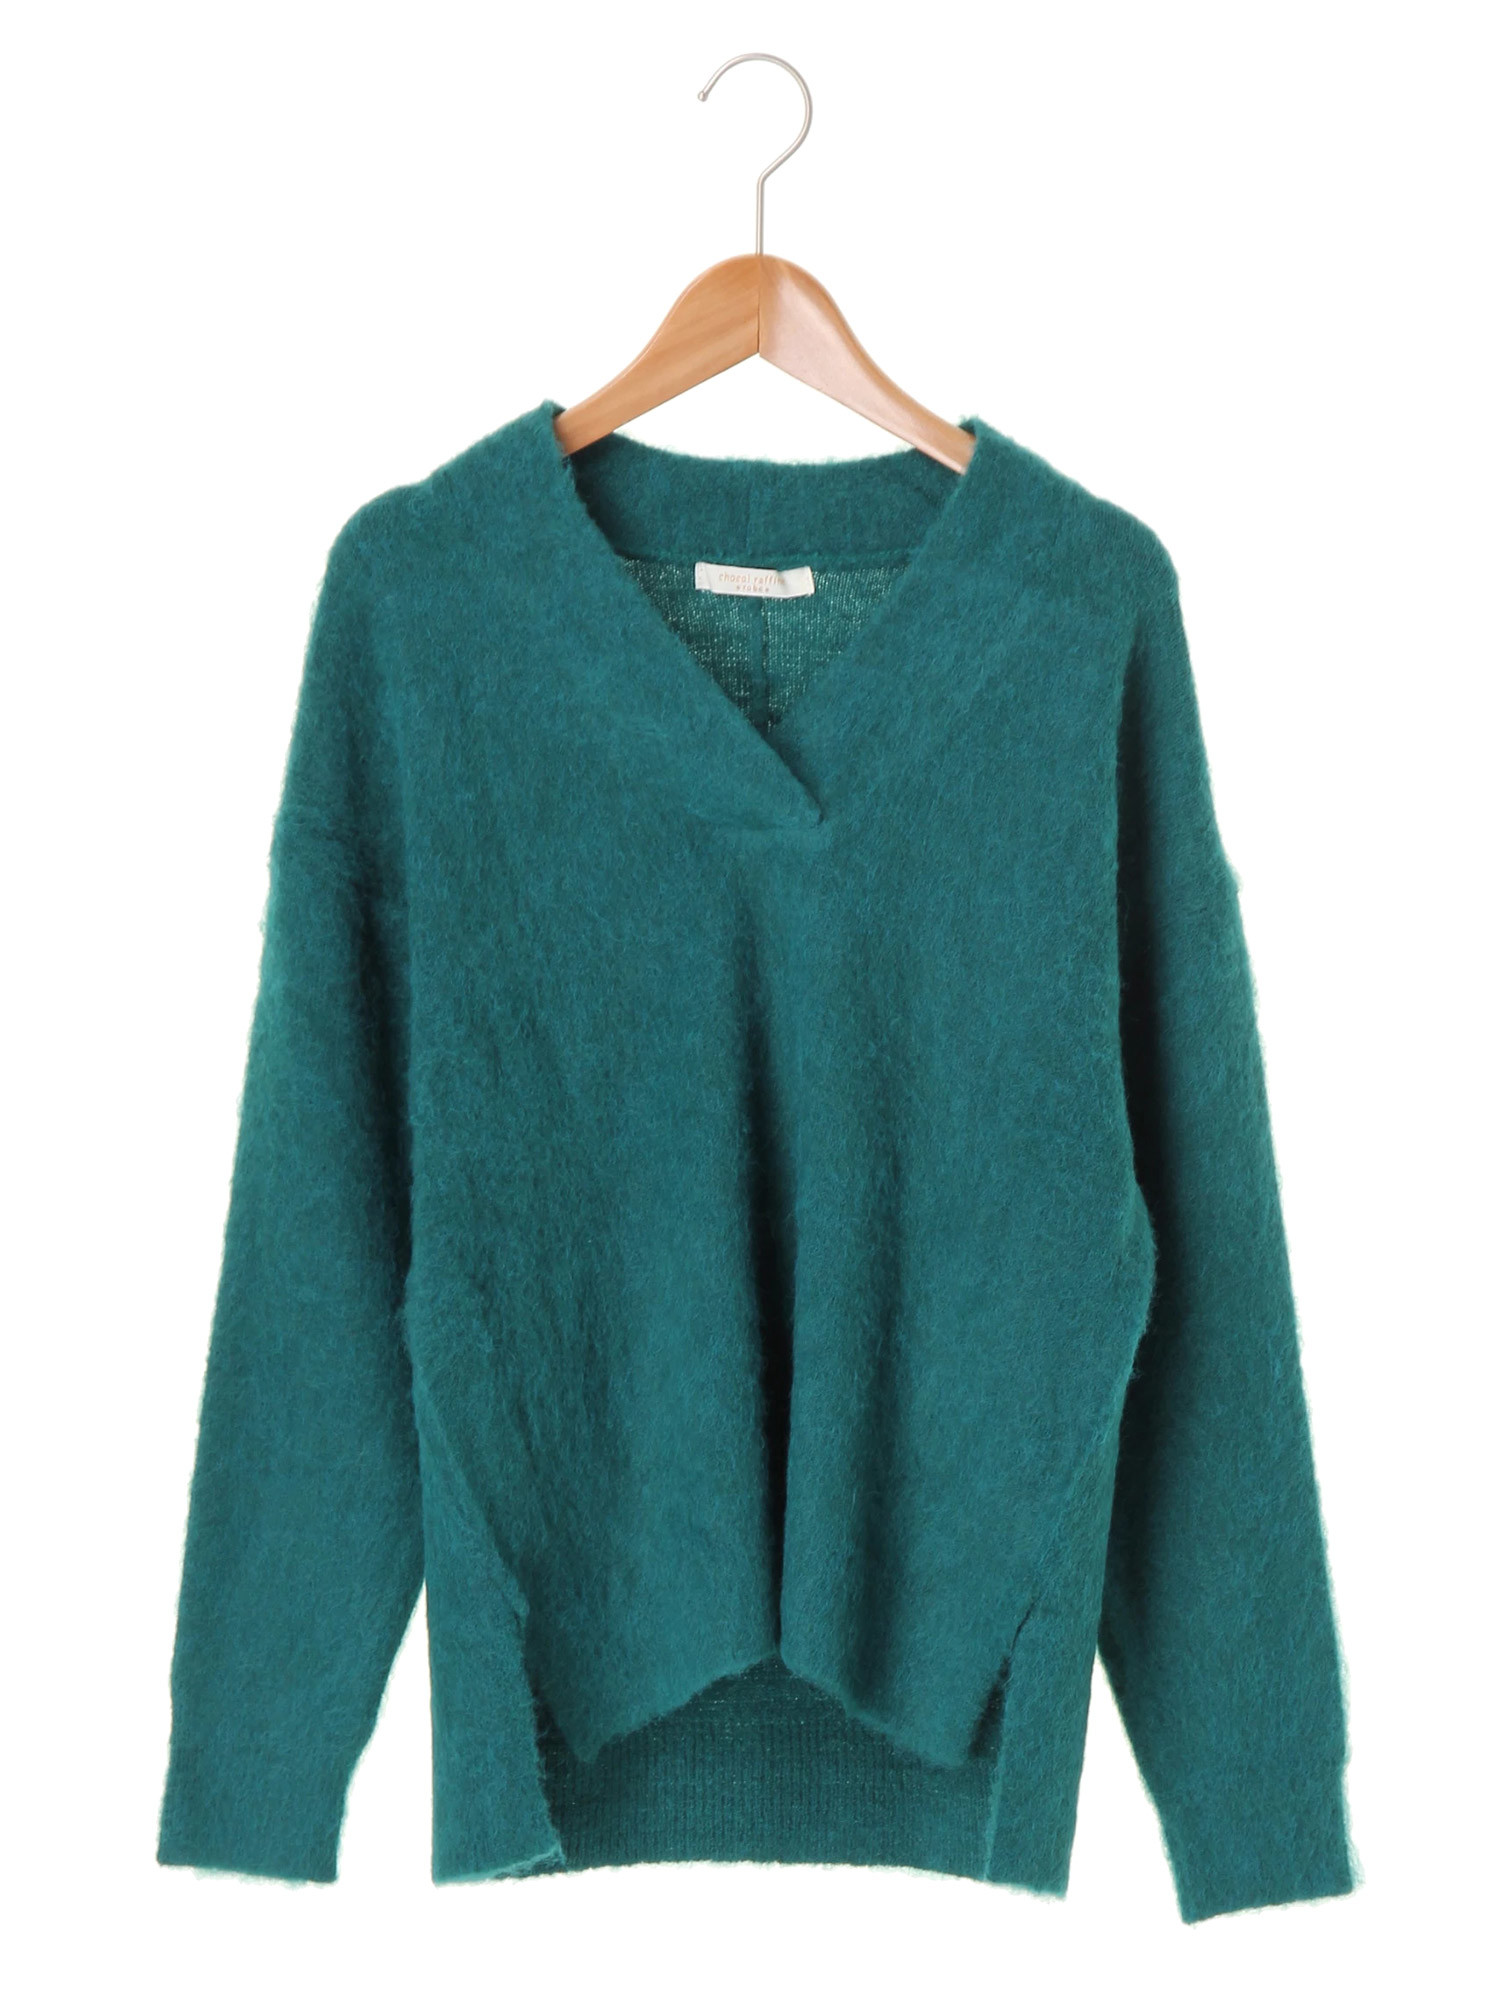

('green', 0.82512522)
('blue', 0.17483675)
('purple', 1.1482804e-05)
('red', 8.1518665e-06)
('pink', 5.9917911e-06)


In [46]:
predict('./data/samples/green.jpg')

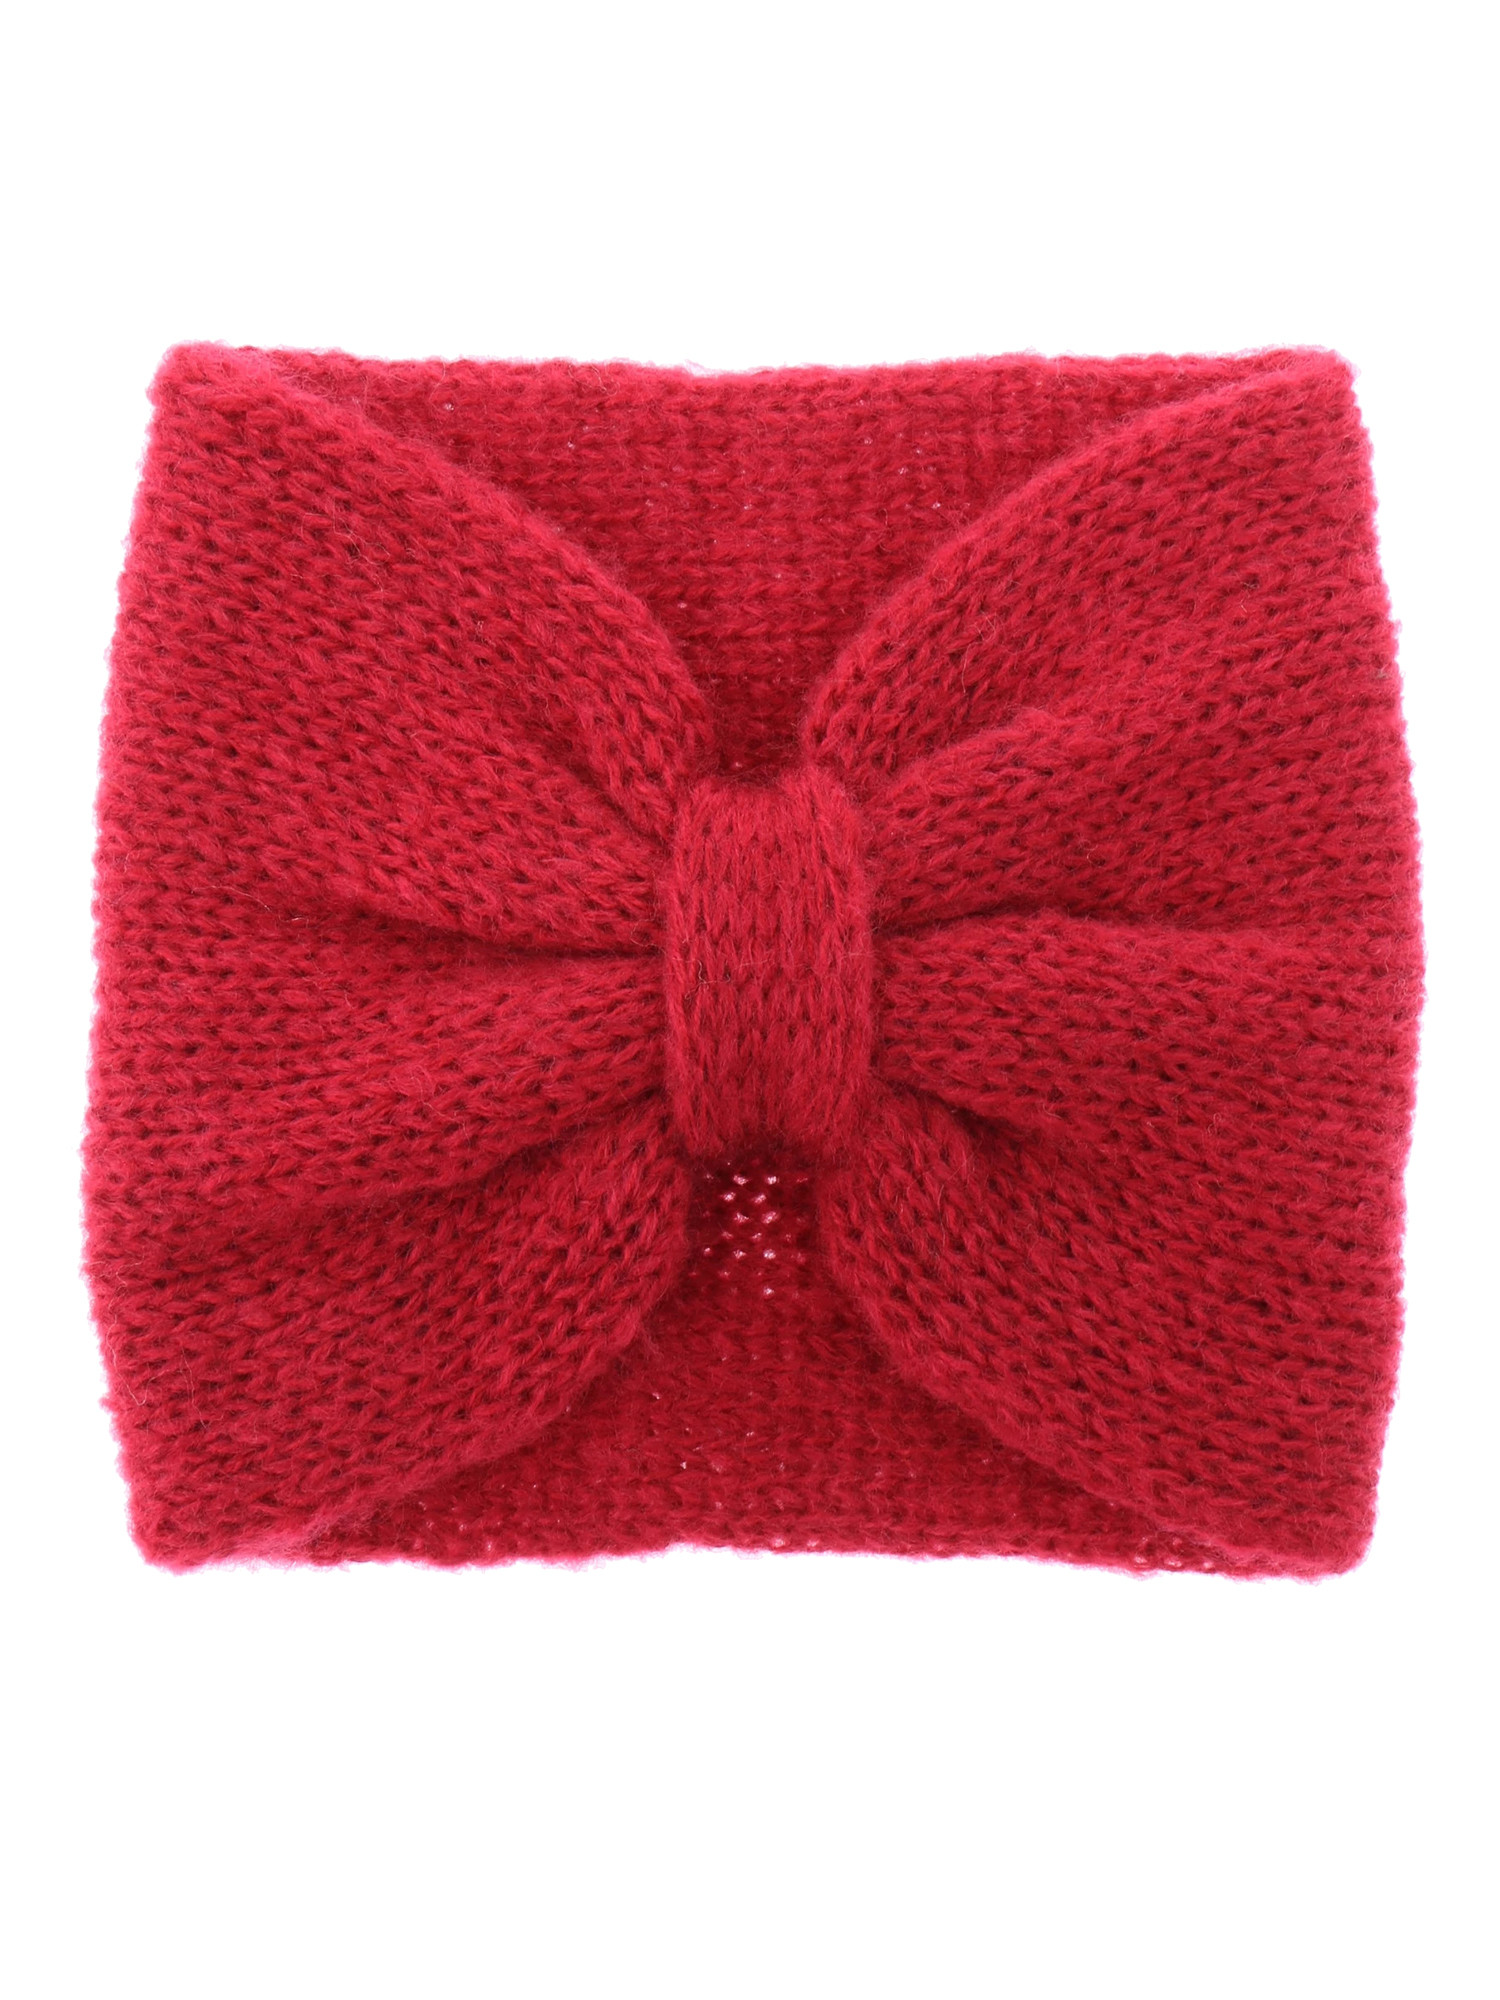

('pink', 0.54155797)
('red', 0.25098419)
('orange', 0.14805873)
('purple', 0.038692754)
('beige', 0.013590798)


In [47]:
predict('./data/samples/red.jpg')

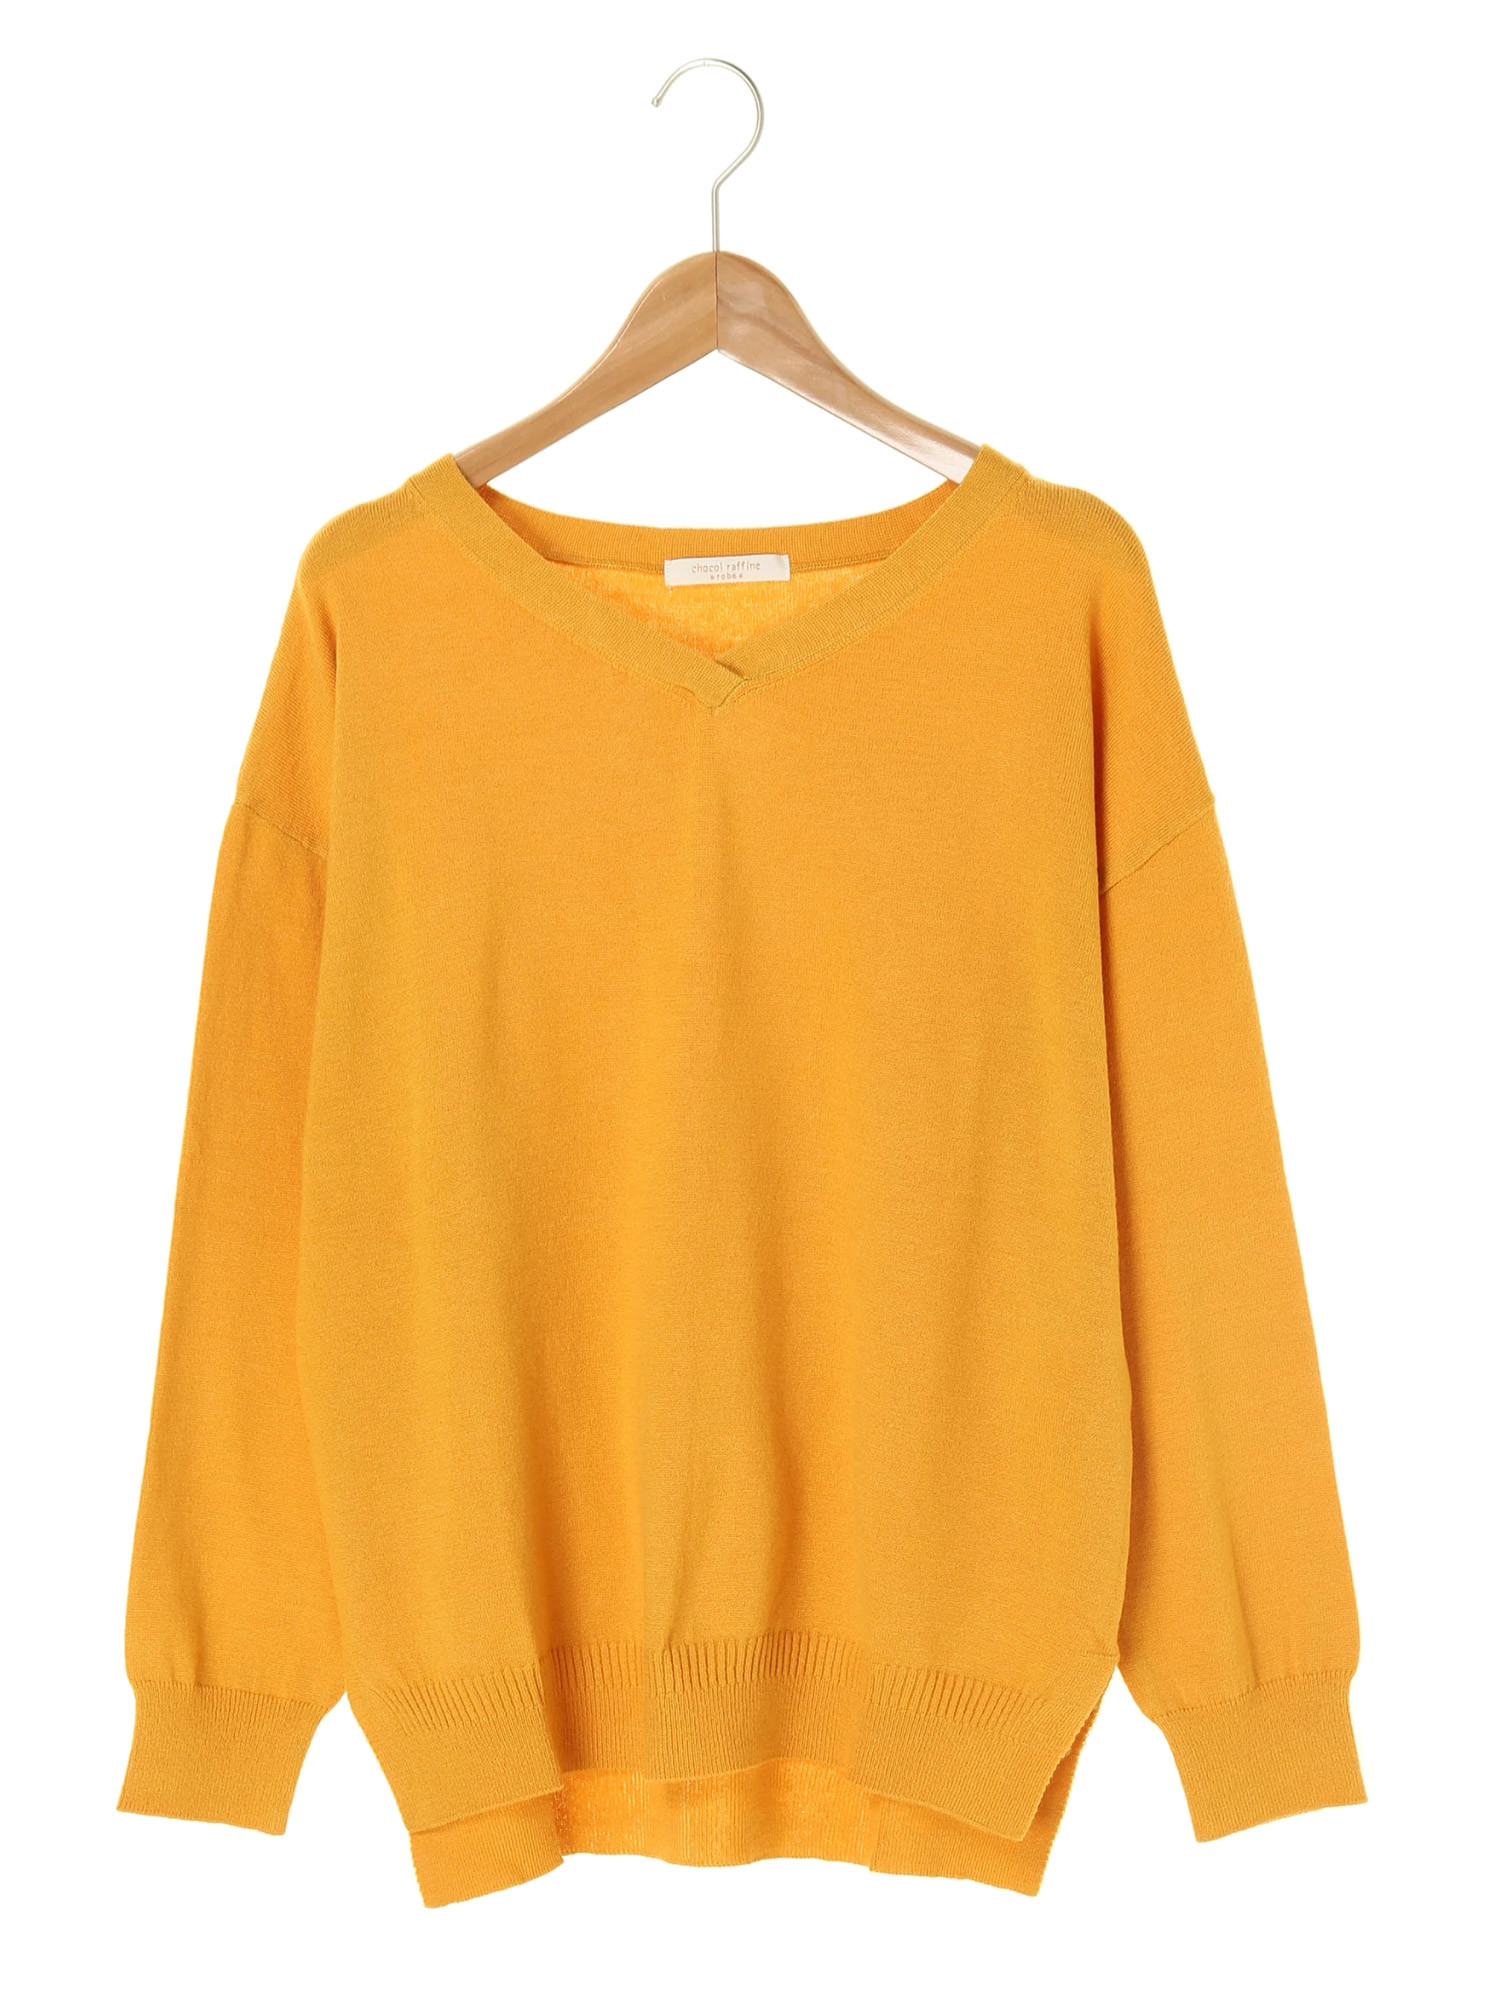

('yellow', 0.95462924)
('orange', 0.035488907)
('pink', 0.0052944091)
('beige', 0.0020154279)
('red', 0.0017493175)


In [48]:
predict('./data/samples/yellow.jpg')